# Importing Libraries

In [187]:
import pandas as pd
import numpy as np

from glob import glob # serve para listar os arquivos das imagens

# Bibliotecas para imagens
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# Organising our Data

In [188]:
dataset_dir = os.path.join(os.getcwd(), 'skin_search')

# Test:
dataset_test_dir = os.path.join(dataset_dir, 'test')
dataset_test_dry_len = len(os.listdir(os.path.join(dataset_test_dir, 'dry')))
dataset_test_normal_len = len(os.listdir(os.path.join(dataset_test_dir, 'normal')))
dataset_test_oily_len = len(os.listdir(os.path.join(dataset_test_dir, 'oily')))

# Train:
dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_dry_len = len(os.listdir(os.path.join(dataset_train_dir, 'dry')))
dataset_train_normal_len = len(os.listdir(os.path.join(dataset_train_dir, 'normal')))
dataset_train_oily_len = len(os.listdir(os.path.join(dataset_train_dir, 'oily')))

# Validate:
dataset_validation_dir = os.path.join(dataset_dir, 'valid')
dataset_validation_dry_len = len(os.listdir(os.path.join(dataset_validation_dir, 'dry')))
dataset_validation_normal_len = len(os.listdir(os.path.join(dataset_validation_dir, 'normal')))
dataset_validation_oily_len = len(os.listdir(os.path.join(dataset_validation_dir, 'oily')))




# Counting our dataset:
print('               QUANTIDADE DE IMAGENS              ')
print('\n--------------------------------------------------')
print('Test dry: %s' % dataset_test_dry_len)
print('Test normal: %s' % dataset_test_normal_len)
print('Test oily: %s' % dataset_test_oily_len)
print('--------------------------------------------------')
print('Train dry: %s' % dataset_train_dry_len)
print('Train normal: %s' % dataset_train_normal_len)
print('Train oily: %s' % dataset_train_oily_len)
print('--------------------------------------------------')
print('Validation dry: %s' % dataset_validation_dry_len)
print('Validation normal: %s' % dataset_validation_normal_len)
print('Validation oily: %s' % dataset_validation_oily_len)

               QUANTIDADE DE IMAGENS              

--------------------------------------------------
Test dry: 35
Test normal: 59
Test oily: 40
--------------------------------------------------
Train dry: 652
Train normal: 1105
Train oily: 1000
--------------------------------------------------
Validation dry: 71
Validation normal: 111
Validation oily: 80


# Image preprocessing for model training

In [189]:
image_width = 160
image_height = 160
image_color_channel = 3 # 3 color dimensions RGB
image_color_channel_size = 255
image_size = (image_width, image_height)
img_shape = image_size + (image_color_channel,)

batch_size = 32 # number of features that I will bring at a time from my dataset
epochs = 30 # number of times that I will iterate trought my dataset
learning_rate = 0.0001

class_names = ['dry', 'normal', 'oily']

In [190]:
# This will classify our images in the outputs 0, 1 or 2 for each one of the categories

dataset_test = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_test_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 134 files belonging to 3 classes.


In [191]:
# This will classify our images in the outputs 0, 1 or 2 for each one of the categories

dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 2757 files belonging to 3 classes.


In [192]:
# This will classify our images in the outputs 0, 1 or 2 for each one of the categories

dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 262 files belonging to 3 classes.


## Ploting our dataset

<Figure size 640x480 with 0 Axes>

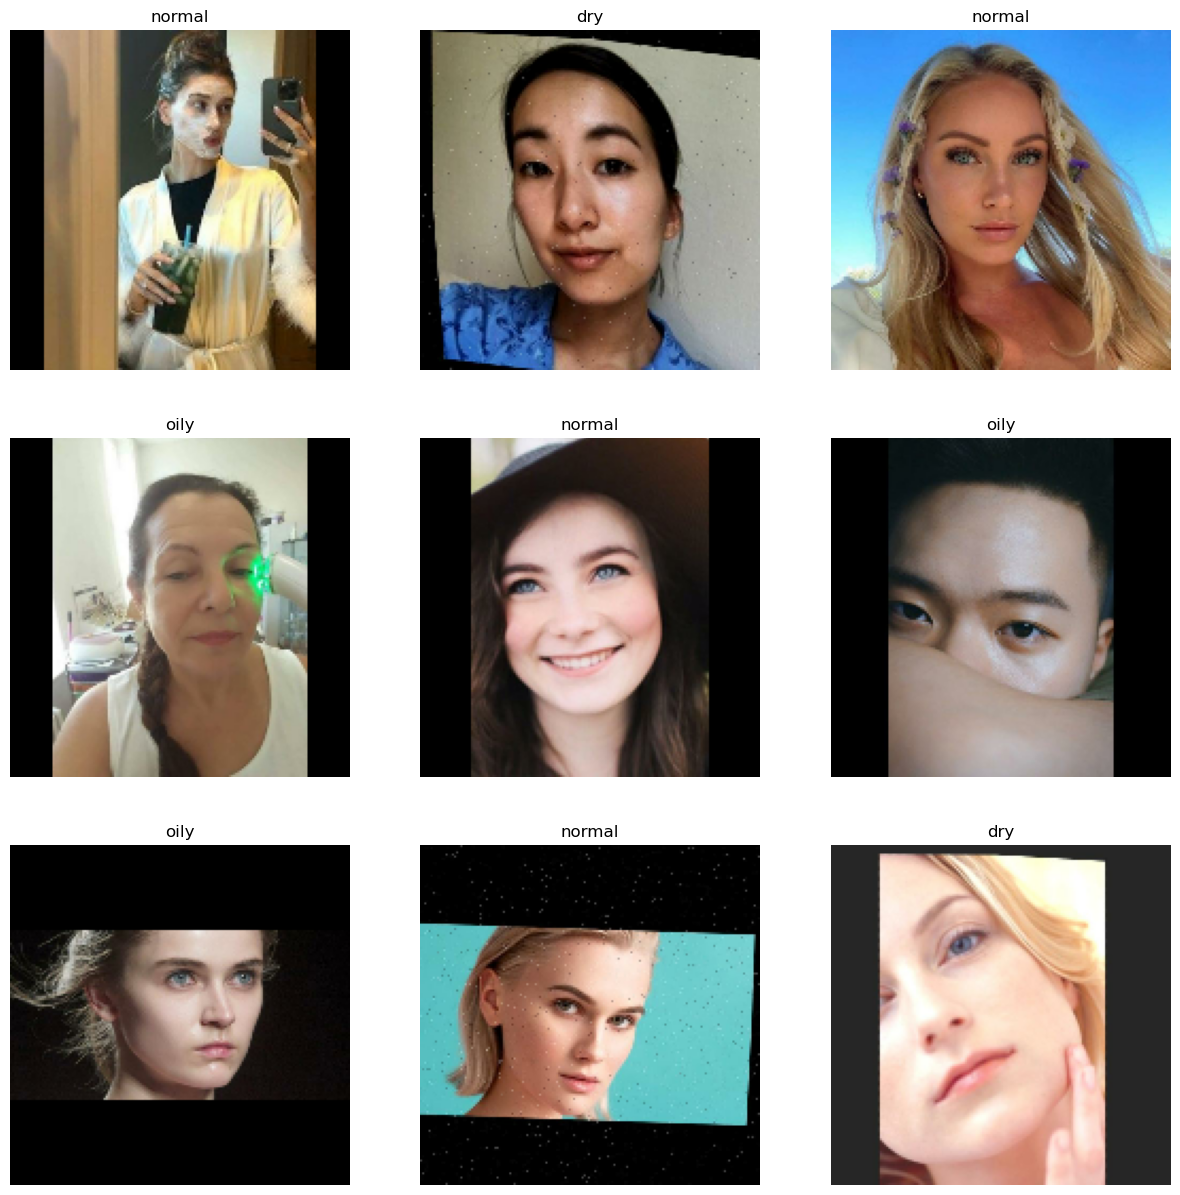

In [193]:
def plot_dataset(dataset):
    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

plot_dataset(dataset_train)

## Normalising and treating

transforming the images in numeric

In [194]:
def data_array(dataset):
    data_out = dataset.as_numpy_iterator().next()
    return data_out

In [195]:
test = data_array(dataset_test)
train =  data_array(dataset_train)
validation =  data_array(dataset_validation)

In [196]:
treino_entrada = train[0]
treino_saida = train[1]

teste_entrada = test[0]
teste_saida = test[1]

treino_saida

array([0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 2])

Categorizing

In [197]:
from tensorflow import keras

y = keras.utils.to_categorical(treino_saida) # This will categorize our categories to binary arrays

print(y.shape)
print(y)

(32, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


Normalizing Entries

In [209]:
from sklearn.preprocessing import MinMaxScaler # This will transform our dataset to number between 0 and 1

""" WRONG CODE
Need to see why the entire array is equal to zero
y = []

for i in treino_entrada:
    for j in i:
        scaler = MinMaxScaler()
        j = scaler.fit_transform(j)
        y = y.append(j)
        
print(y)
"""

"""  CORRECTED CODE WITH COPILOT HELP:

Problema com o MinMaxScaler: O MinMaxScaler é usado para dimensionar os dados para um intervalo entre 0 e 1. 
No entanto, ele não funciona corretamente quando aplicado a uma lista de listas (como no seu caso). Ele 
espera um array NumPy ou um DataFrame

Solução: Para resolver isso, você precisa converter sua lista de listas em um array NumPy antes de aplicar o 
MinMaxScaler. Além disso, você pode usar a função reshape para garantir que as dimensões estejam corretas.
"""

# Suponha que 'treino_entrada' seja uma lista de listas
# Converta para um array NumPy
#treino_entrada_array = np.array(treino_entrada)

# Inicialize o MinMaxScaler
scaler = MinMaxScaler()

# Aplique o scaler a cada elemento da matriz
x = []
for i in treino_entrada:
    for j in i:
        j_scaled = scaler.fit_transform(j.reshape(-1, 1))  # Reshape para 2D
        x.append(j_scaled)

In [199]:
x = np.array(x)
x.shape

(5120, 480, 1)

In [200]:
x

array([[[0.03707743],
        [0.03707743],
        [0.03707743],
        ...,
        [0.03707743],
        [0.03707743],
        [0.03707743]],

       [[0.02370203],
        [0.02370203],
        [0.02370203],
        ...,
        [0.02370203],
        [0.02370203],
        [0.02370203]],

       [[0.04939628],
        [0.04939628],
        [0.04939628],
        ...,
        [0.04939628],
        [0.04939628],
        [0.04939628]],

       ...,

       [[0.04779413],
        [0.04779413],
        [0.04779413],
        ...,
        [0.04779413],
        [0.04779413],
        [0.04779413]],

       [[0.08156028],
        [0.08156028],
        [0.08156028],
        ...,
        [0.08156028],
        [0.08156028],
        [0.08156028]],

       [[0.05128206],
        [0.05128206],
        [0.05128206],
        ...,
        [0.05128206],
        [0.05128206],
        [0.05128206]]], dtype=float32)

# Creating a Machine Learning Supervised Learning model - type Image Classification¶

In [201]:
model = tf.keras.models.Sequential([
    
    # Input:
    tf.keras.layers.Rescaling(1.0 / image_color_channel_size, 
                              input_shape=img_shape),

    # Hidden Layers:
    tf.keras.layers.Conv2D(16, 3, padding = 'same', activation = 'relu'), # 16 = number os neurons, 3 = number of dimensions, relu = binary activation
    tf.keras.layers.MaxPooling2D(), # used for spatial data, such as images
    
    tf.keras.layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),

    # Output:
    tf.keras.layers.Dense(3, activation = 'softmax'), # Softmax activation is used for cathegorical data and 3 are the dimensions in our dataset
    tf.keras.layers.Dense(3, activation = 'softmax')
])

C:\Users\fatima\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [202]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 160, 160, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 80, 80, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 80, 80, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 40, 40, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 40, 40, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │        76,803 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 100,399 (392.18 KB)

 Trainable params: 100,399 (392.18 KB)

 Non-trainable params: 0 (0.00 B)

## Training

Compiling

In [203]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [204]:
y.shape

(32, 3)

In [205]:
treino_entrada.shape

(32, 160, 160, 3)

In [206]:
x.shape # X dimensions are changing, that's why we are having errors

(5120, 480, 1)

In [208]:
x_train_norm = x.reshape(160,  3)

ValueError: cannot reshape array of size 2457600 into shape (160,3)

In [ ]:
historico =model.fit(treino_entrada, y, epochs=epochs, validation_split=0.3)

In [ ]:
def plot_data_set_predictions(dataset):

    features, labels = output(dataset)

    predictions = model.predict_on_batch(features).flatten()
    predictions = tf.where(predictions < -1, 0, 2)

    print('labels:       %s' % labels)
    print('predictions:  %s' % predictions.numpy())

    plt.gcf().clear()
    plt.figure(figsize = (15,15))

    for i in range (9):
        plt.subplot(3, 3, i + 1)
        plt.axis('off')

        plt.imshow(features[i].astype('uint8'))
        plt.title(class_names[predictions[i]])

In [ ]:
plot_data_set_predictions(dataset_test)